# Time series forecasting E-commerce sales using Neural Prophet

In [37]:
import pandas as pd
from neuralprophet import NeuralProphet
import pickle

In [44]:
df_commerce = pd.read_csv('../data/e_commerce_uk.csv', encoding = 'ISO-8859-1')

In [45]:
df_commerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [46]:
df = pd.DataFrame({
    'ds': pd.to_datetime(df_commerce.InvoiceDate),
    'y': df_commerce.Quantity * df_commerce.UnitPrice
}).groupby('ds').sum().reset_index().rename(columns={'index':'ds'})

df.shape

(23260, 2)

In [47]:
df.head()

,ds,y
0,2010-12-01 08:26:00,139.12
1,2010-12-01 08:28:00,22.20
2,2010-12-01 08:34:00,348.78
3,2010-12-01 08:35:00,17.85
4,2010-12-01 08:45:00,855.86


<AxesSubplot: >

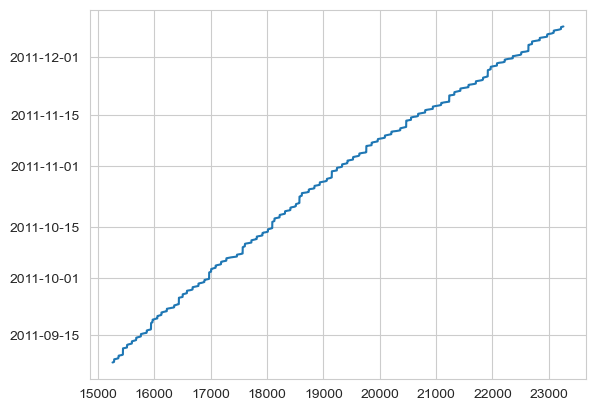

In [106]:
df.ds.plot()

In [48]:
df = df[-8000:]

In [93]:
m = NeuralProphet(n_changepoints=0, weekly_seasonality=False, learning_rate=0.001, epochs=3000, n_forecasts=1)

df_train, df_test = m.split_df(df=df, freq="H", valid_p=0.2)

INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 24.475% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq H. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.


In [94]:
train_metrics = m.fit(df, freq='H');

INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 24.475% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq H. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
WARNING - (py.warnings._showwarnmsg) - /opt/homebrew/Caskroom/miniforge/base/envs/forecastingEcommerceSales/lib/python3.8/site-packages/neuralprophet/df_utils.py:161: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - /opt/homebrew/Caskroom/mini

In [95]:
test_metrics = m.test(df)

INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 24.475% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq H. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss     MAE     RMSE
1         0.000 544.664 2085.041


In [111]:
future = m.make_future_dataframe(df=df, periods=300, n_historic_predictions=True)
forecast = m.predict(df=future)

INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 24.475% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq H. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
WARNING - (py.warnings._showwarnmsg) - /opt/homebrew/Caskroom/miniforge/base/envs/forecastingEcommerceSales/lib/python3.8/site-packages/neuralprophet/forecaster.py:2060: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future_df)

INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 23.59% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq H. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INF

In [113]:
forecast.head()

,ds,y,yhat1,residual1,trend,season_weekly,season_daily
0,2011-09-07 12:41:00,121.50,294.640625,173.140625,-36658.343750,-12.454302,36965.441406
1,2011-09-07 12:44:00,5557.66,292.109375,-5265.550625,-36658.296875,-12.357379,36962.769531
2,2011-09-07 12:48:00,-224.47,289.203125,513.673125,-36658.234375,-12.228116,36959.671875
3,2011-09-07 12:50:00,323.68,287.968750,-35.711250,-36658.203125,-12.163476,36958.332031
4,2011-09-07 12:55:00,524.85,285.515625,-239.334375,-36658.125000,-12.001860,36955.632812


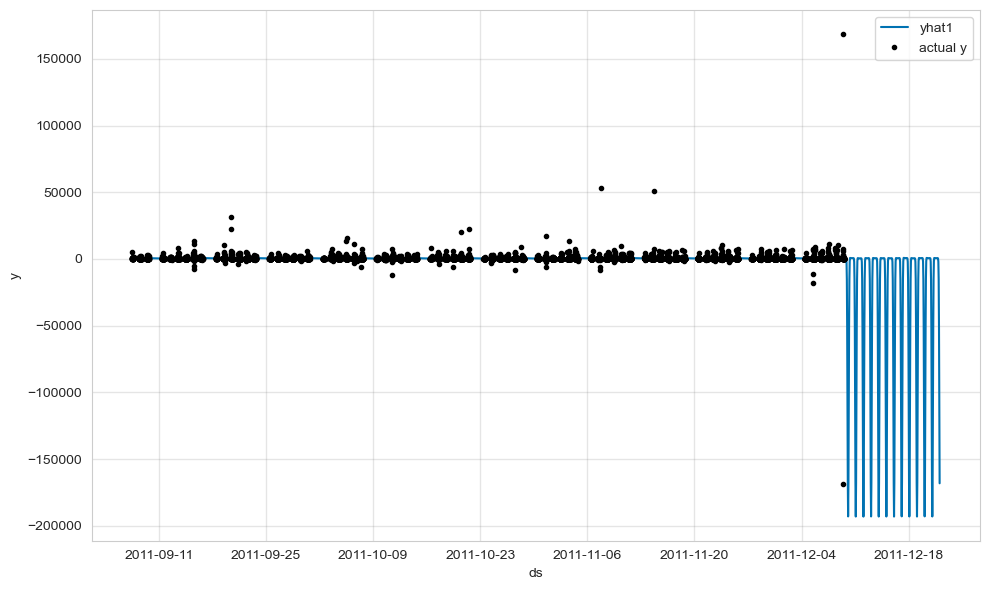

In [114]:
_ = m.plot(forecast)

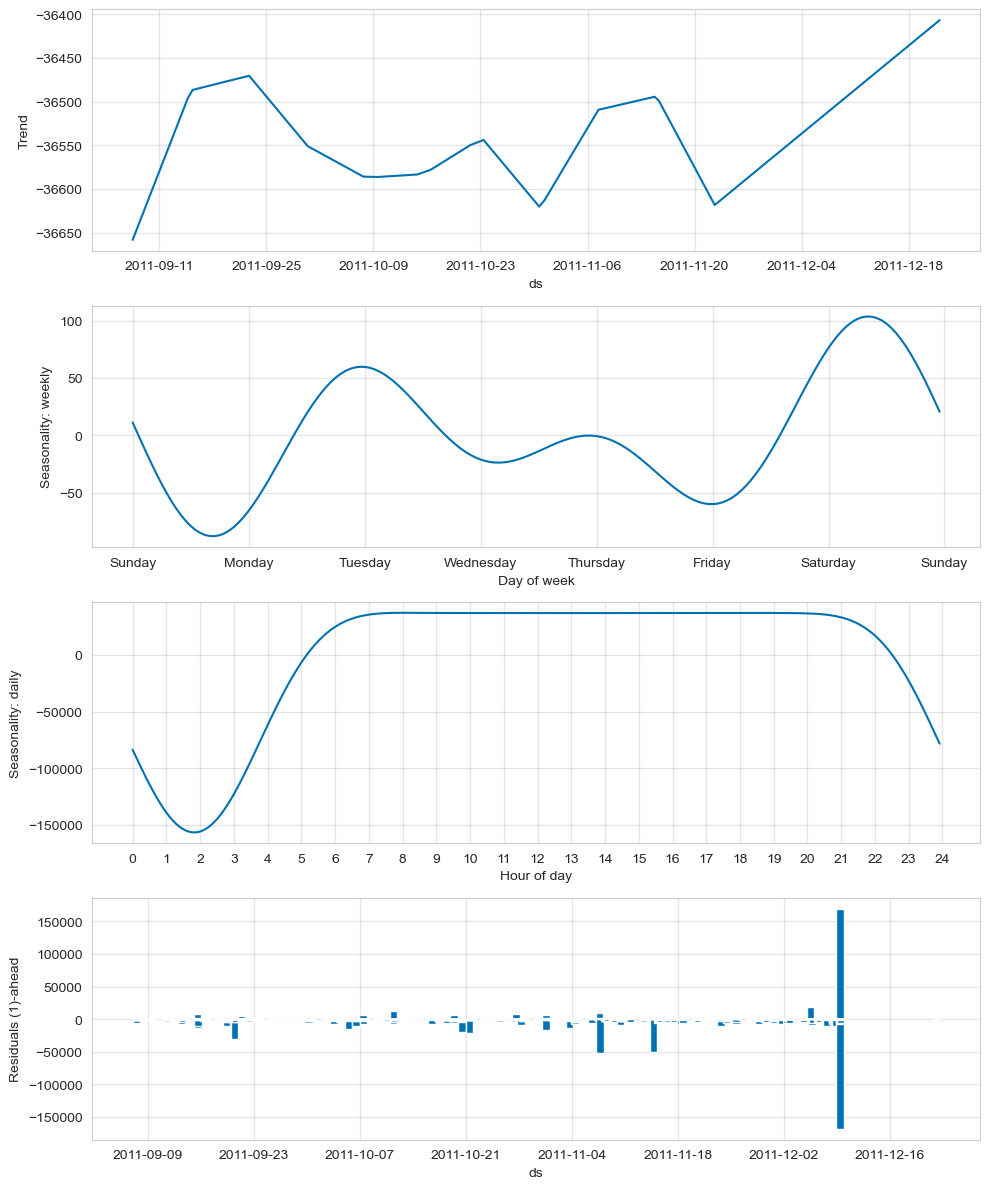

In [115]:
_ = m.plot_components(forecast, residuals=True)

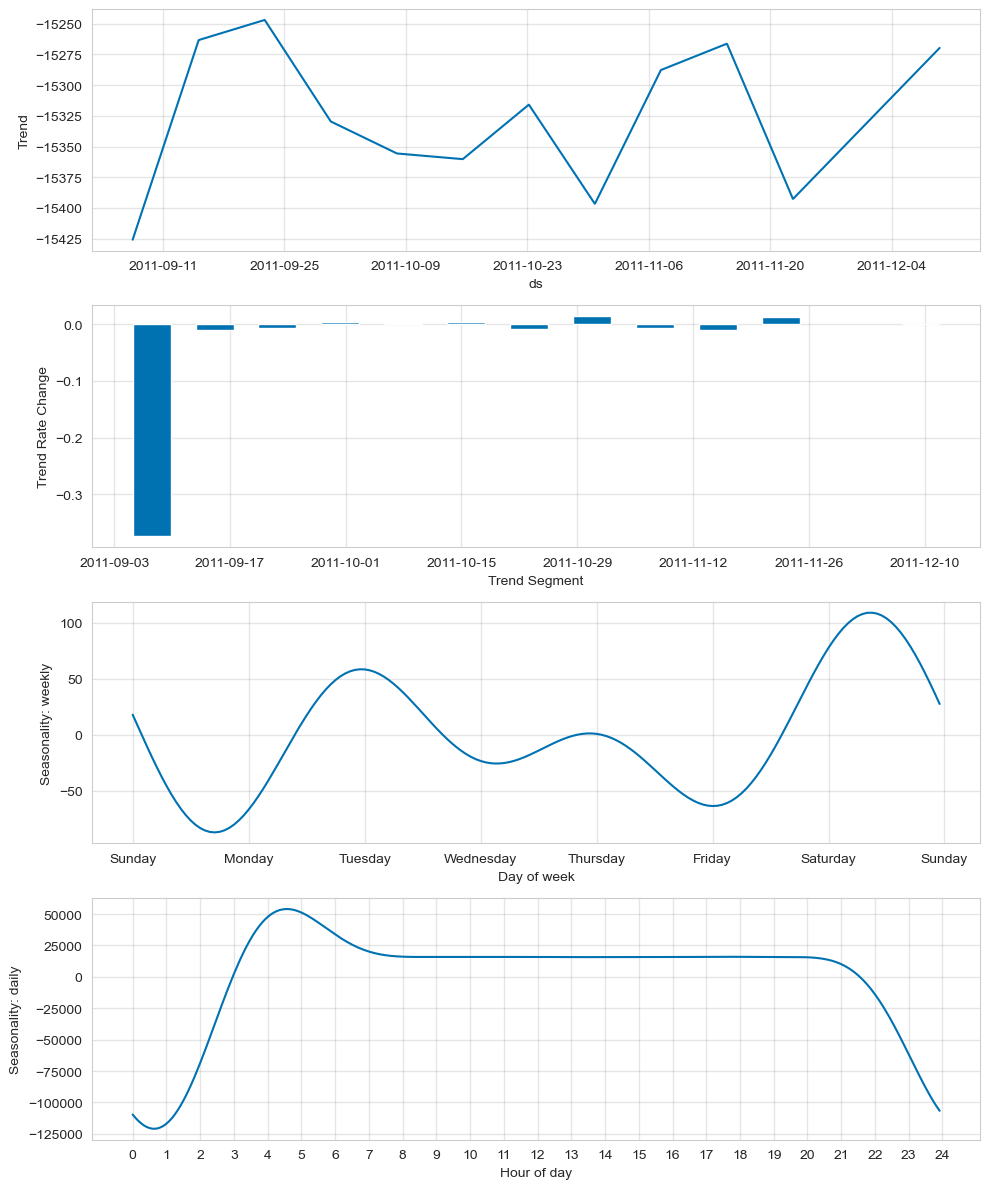

In [74]:
_ = m.plot_parameters()

### Save model

In [75]:
with open('../models/n_prophet_fcast.pkl', 'wb') as f:
    pickle.dump(m, f)

### Load model

In [76]:
stored_m = None

with open('../models/n_prophet_fcast.pkl', 'rb') as f:
    stored_m = pickle.load(f)

In [90]:
future = stored_m.make_future_dataframe(df=df, periods=10)
forecast = stored_m.predict(df=future)

INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 24.475% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq H. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 90.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 90.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
WARNING - (py.warnings._showwarnmsg) - /opt/homebrew/Caskroom/miniforge/base/envs/forecastingEcommerceSales/lib/python3.8/site-packages/neuralprophet/forecaster.py:1406: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [91]:
forecast.head()

,ds,y,yhat1,residual1,trend,season_weekly,season_daily
0,2011-12-09 13:50:00,None,479.203125,NaN,-15269.343750,-4.126756,15752.667969
1,2011-12-09 14:50:00,None,586.265625,NaN,-15269.046875,3.945738,15851.375000
2,2011-12-09 15:50:00,None,544.593750,NaN,-15268.750000,12.234771,15801.108398
3,2011-12-09 16:50:00,None,631.046875,NaN,-15268.437500,20.661726,15878.824219
4,2011-12-09 17:50:00,None,719.796875,NaN,-15268.140625,29.144897,15958.797852


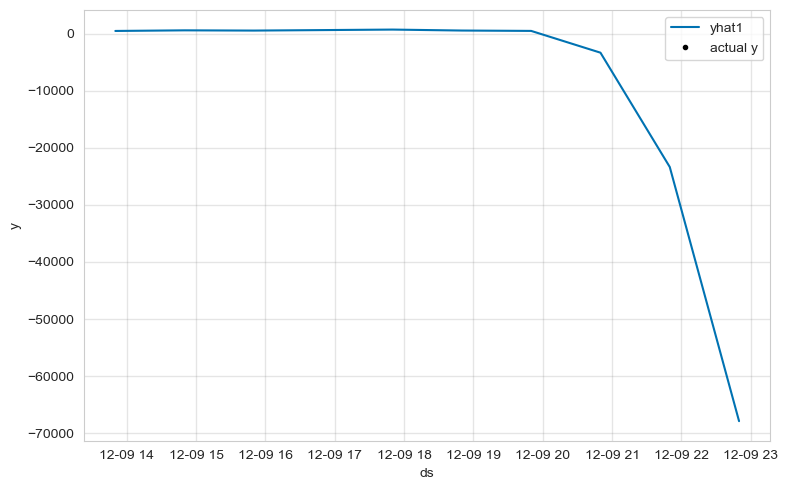

In [92]:
_ = m.plot(forecast, figsize=(8,5))

## Sub-daily time series using 5min bins

In [116]:
m = NeuralProphet(
    changepoints_range=0.95,
    n_changepoints=50,
    trend_reg=1,
    weekly_seasonality=False,
    daily_seasonality=10
)

INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.


### Down-sample the series into 5 minute bins and sum the values

In [124]:
df = df.set_index('ds').resample('5T').sum().reset_index()

In [125]:
metrics = m.fit(df, freq='5min')

INFO - (NP.df_utils._infer_frequency) - Major frequency 5T corresponds to 99.996% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 5min
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
WARNING - (py.warnings._showwarnmsg) - /opt/homebrew/Caskroom/miniforge/base/envs/forecastingEcommerceSales/lib/python3.8/site-packages/neuralprophet/df_utils.py:161: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - /opt/homebrew/Caskroom/miniforge/base/envs/forecastingEcommerceSales/lib/python3.8/site-packages/neuralprophet/df_utils.py:161: FutureWarning: In a future version, `df.iloc

  0%|          | 0/160 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.54E+00, min: 4.57E-02


  0%|          | 0/160 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.84E-01, min: 5.94E-02
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.53E-01
Epoch[80/80]: 100%|██████████| 80/80 [00:17<00:00,  4.48it/s, SmoothL1Loss=4.94e-5, MAE=249, RMSE=685, RegLoss=9.58e-7]          


In [126]:
future = m.make_future_dataframe(df, periods=60//5*24*7, n_historic_predictions=True)
forecast = m.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency 5T corresponds to 99.996% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 5min
WARNING - (py.warnings._showwarnmsg) - /opt/homebrew/Caskroom/miniforge/base/envs/forecastingEcommerceSales/lib/python3.8/site-packages/neuralprophet/forecaster.py:2060: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future_df)

INFO - (NP.df_utils._infer_frequency) - Major frequency 5T corresponds to 99.997% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 5min
INFO - (NP.df_utils._infer_frequency) - Major frequency 5T corresponds to 99.997% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 5min
WARNING - (py.warnings._showwarnmsg) - /opt/homebrew/Caskroom/miniforge/base/envs/forecastingEcommerceSa

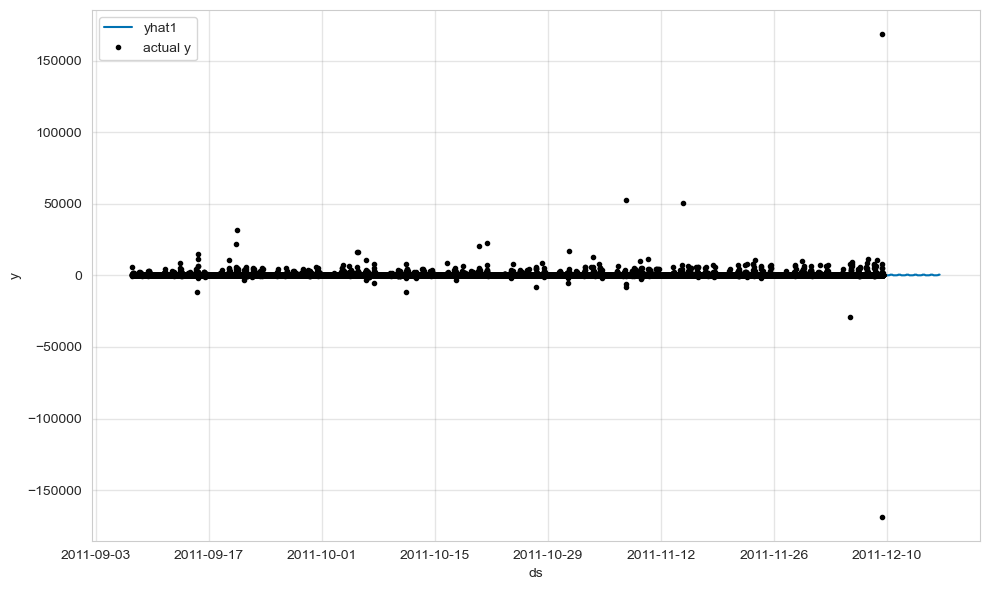

In [127]:
_ = m.plot(forecast)

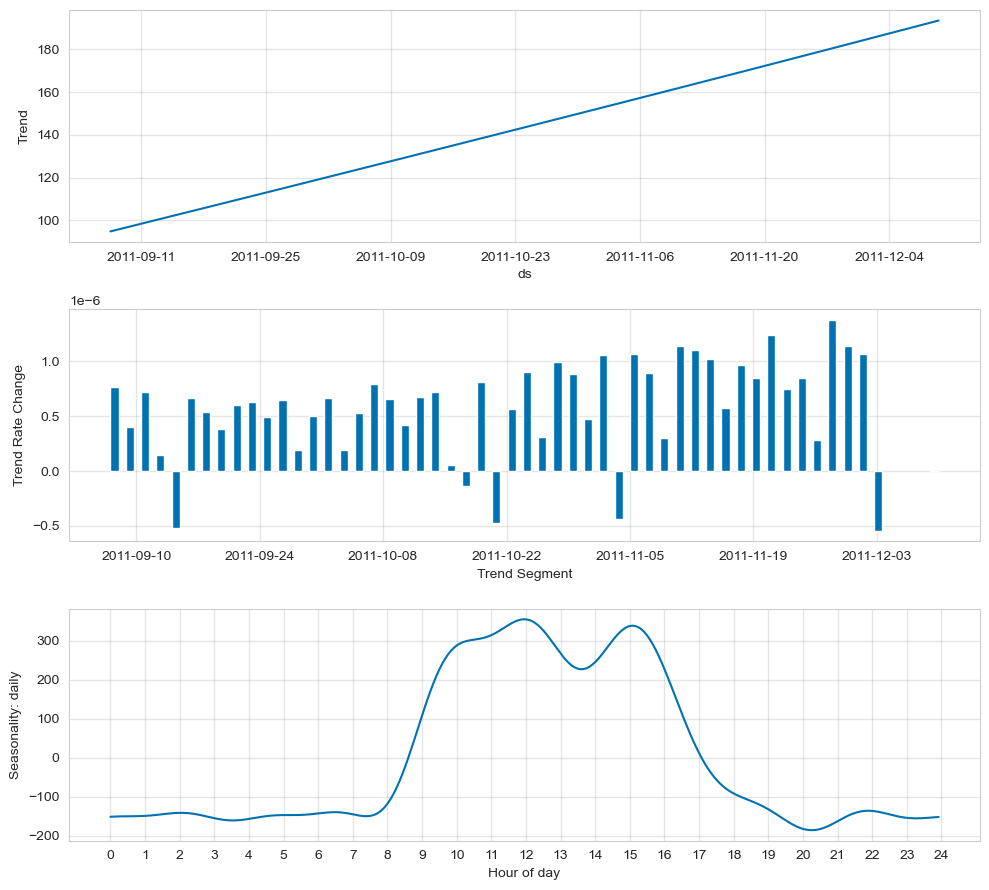

In [128]:
_ = m.plot_parameters()